<a href="https://colab.research.google.com/github/Riteshbhalerao11/D11AD_DAV_05/blob/main/DAV_Exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

import warnings
warnings.filterwarnings("ignore")

# Downloading the Dataset

In [ ]:
od.download("https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: riteshbhalerao
Your Kaggle Key: ··········


100%|██████████| 48.5k/48.5k [00:00<00:00, 64.2MB/s]

In [ ]:
data = pd.read_csv("/content/student-performance-multiple-linear-regression/Student_Performance.csv")

In [ ]:
# Viewing the first 5 entries
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Providing some info regarding the columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# Describing some of the stats of the data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Visualizing the Data

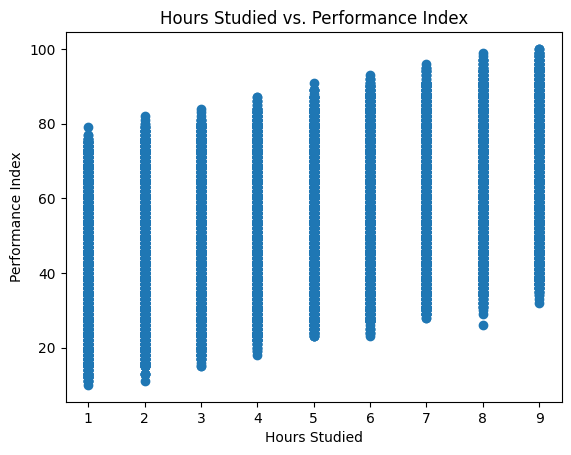

In [ ]:
# Scatter Plot: Hours Studied vs. Performance Index
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.show()

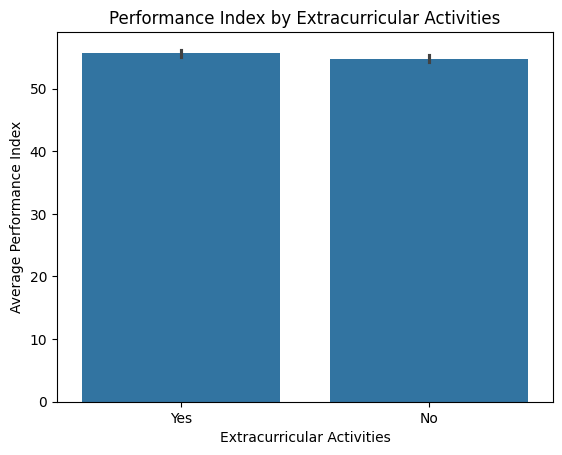

In [ ]:
# Bar Plot: Average Performance Index for Extracurricular Activities
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.show()

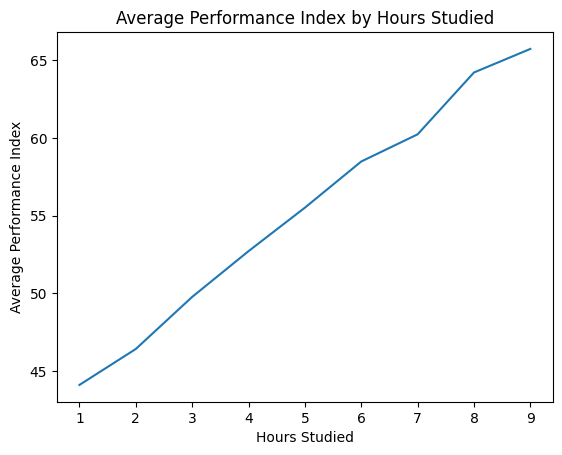

In [ ]:
# Visualize the average performance index across different levels of the "Hours Studied" variable
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

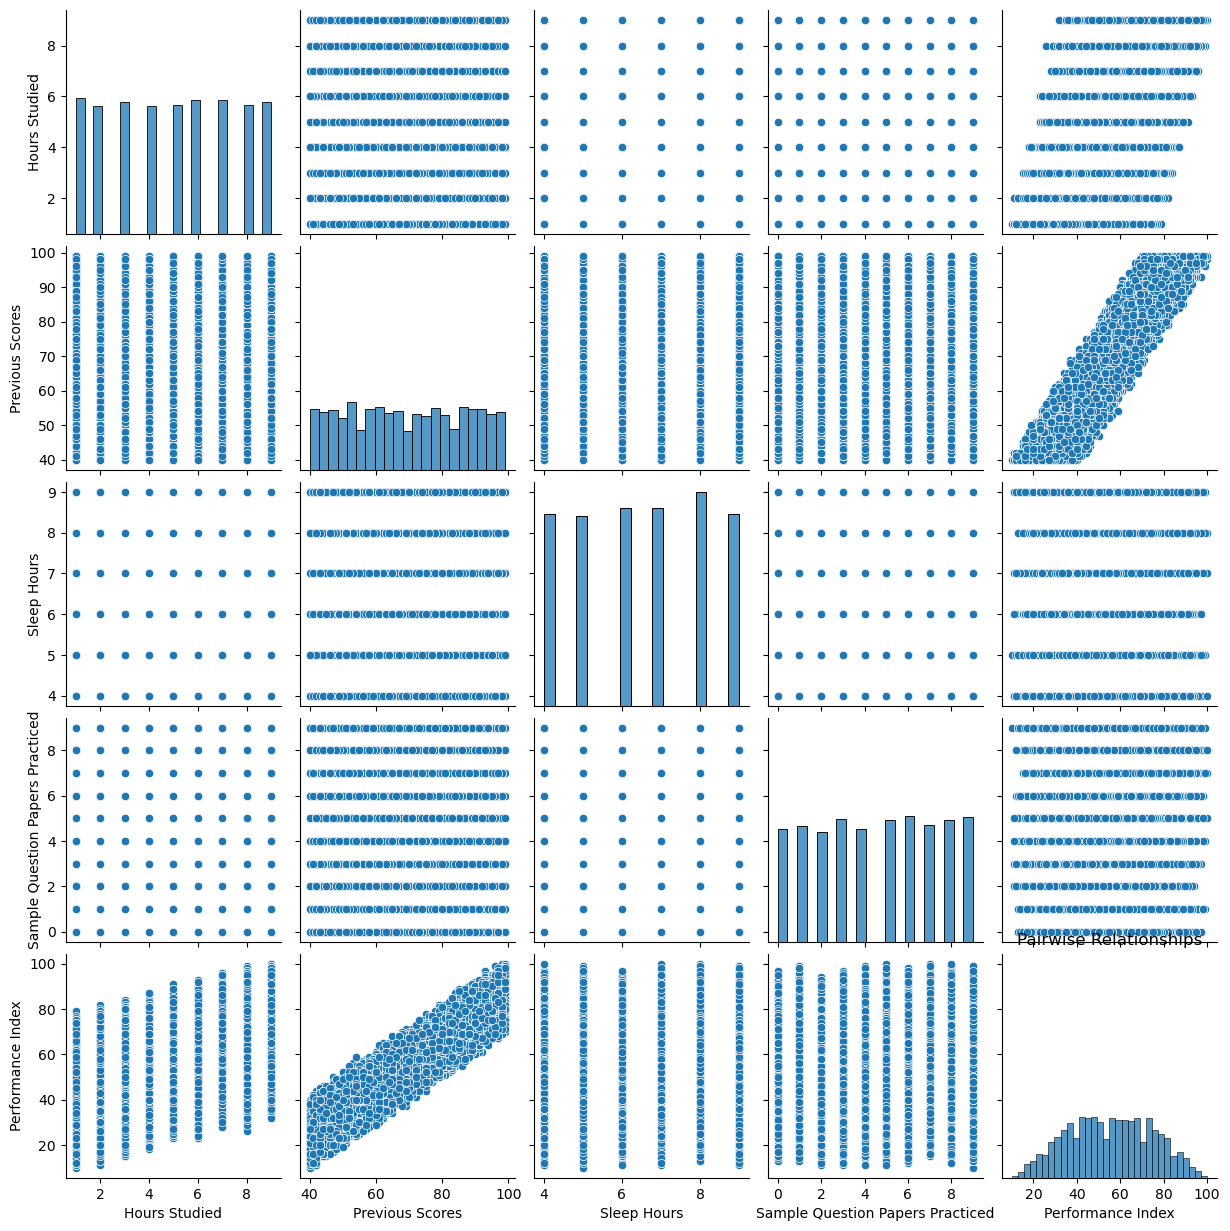

In [ ]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title('Pairwise Relationships')
plt.show()

# Training the Data

In [ ]:
# Splitting data into Independent and Dependent Variable
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [ ]:
# Splitting data into Train and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Label Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [ ]:
# Training a Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Evaluating Results

In [ ]:
# Predicting Test Set Results
y_pred = regressor.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [ ]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})

,Actual Performance,Predicted Performance
6252,51.0,54.71
4684,20.0,22.62
1731,46.0,47.90
4742,28.0,31.29
4521,41.0,43.00
...,...,...
6412,45.0,46.89
8285,66.0,62.70
7853,16.0,16.79
1095,65.0,63.34


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)

In [ ]:
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)

Mean Squared Error :  4.0826094
R Square :  0.9889833422235986


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.92194621555638


## R code starts here

In [ ]:
# Install required packages
install.packages(c("ggplot2", "dplyr", "reshape2",'caret'))

# Load required libraries
library(ggplot2)
library(dplyr)
library(reshape2)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘plyr’, ‘Rcpp’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice



In [2]:
# Read the CSV file into a dataframe
data <- read.csv("/content/student-performance-multiple-linear-regression/Student_Performance.csv")

In [3]:
# Splitting data into Independent and Dependent Variable
X <- data[, !names(data) %in% "Performance Index"]
y <- data$`Performance Index`

In [4]:
# View the first 5 entries
head(data)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


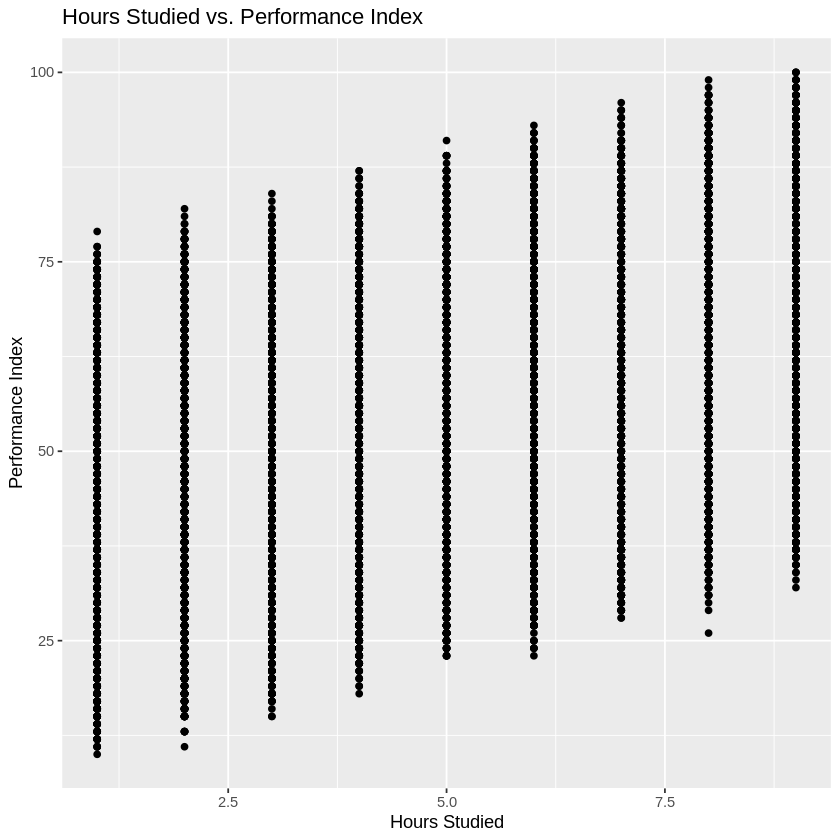

In [5]:
# Scatter Plot: Hours Studied vs. Performance Index
ggplot(data, aes(x = `Hours.Studied`, y = `Performance.Index`)) +
  geom_point() +
  xlab('Hours Studied') +
  ylab('Performance Index') +
  ggtitle('Hours Studied vs. Performance Index')

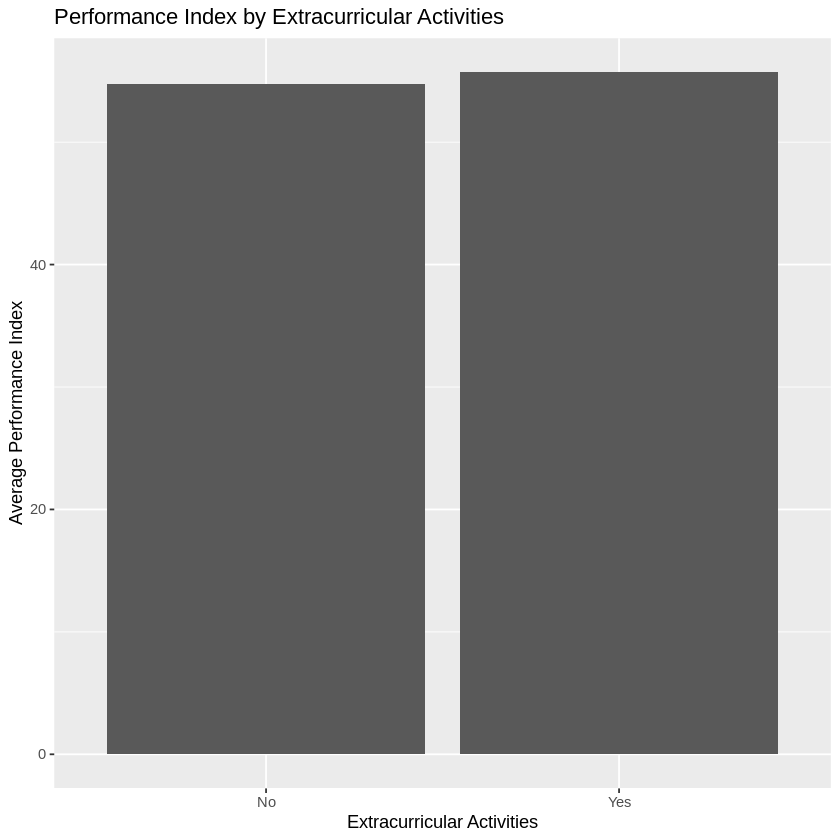

In [6]:
# Bar Plot: Average Performance Index for Extracurricular Activities
data %>%
  group_by(`Extracurricular.Activities`) %>%
  summarise(Avg_Performance_Index = mean(`Performance.Index`)) %>%
  ggplot(aes(x = `Extracurricular.Activities`, y = Avg_Performance_Index)) +
  geom_bar(stat = 'identity') +
  xlab('Extracurricular Activities') +
  ylab('Average Performance Index') +
  ggtitle('Performance Index by Extracurricular Activities')

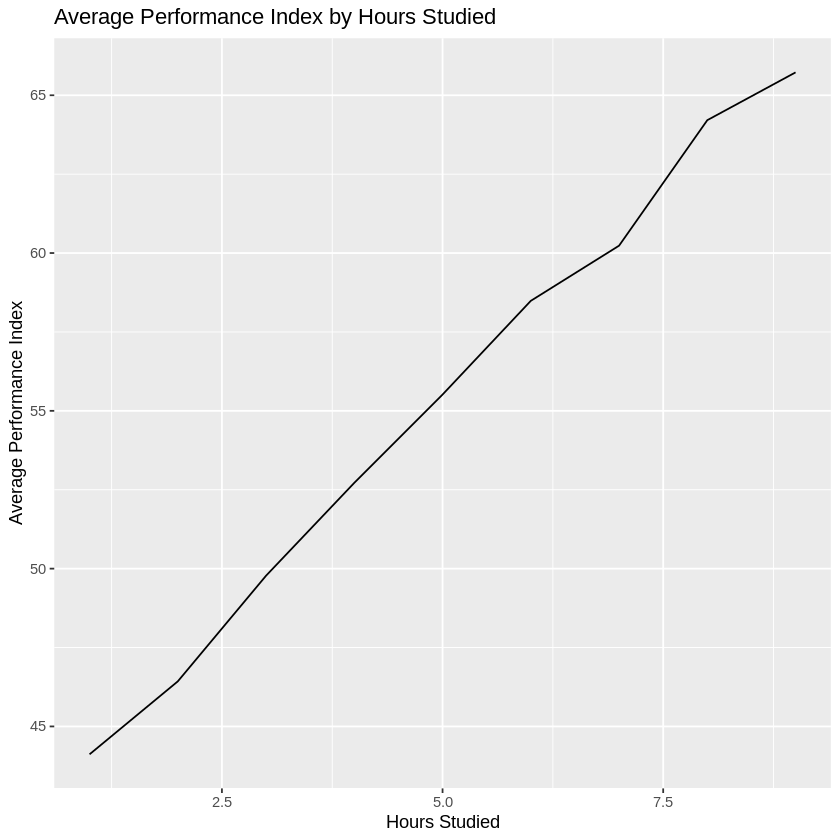

In [7]:
# Visualize the average performance index across different levels of the "Hours Studied" variable
avg_performance_by_hours <- data %>%
  group_by(`Hours.Studied`) %>%
  summarise(Avg_Performance_Index = mean(`Performance.Index`))

ggplot(avg_performance_by_hours, aes(x = `Hours.Studied`, y = Avg_Performance_Index)) +
  geom_line() +
  xlab('Hours Studied') +
  ylab('Average Performance Index') +
  ggtitle('Average Performance Index by Hours Studied')

In [8]:
# Splitting data into Train and Test set
set.seed(42) # for reproducibility
split <- sample(1:nrow(data), 0.8*nrow(data)) # 80% train, 20% test

X_train <- data[split, ]
X_test <- data[-split, ]

In [17]:
# Splitting data into Independent and Dependent Variable
X_t <- X_train[, !names(data) %in% "Performance Index"]
y_t <- X_train$`Performance.Index`
test_x <- X_test[, !names(data) %in% "Performance Index"]
test_y <- X_test$`Performance.Index`

In [18]:
# Label Encoding the Categorical Column
X_t$`Extracurricular.Activities` <- as.integer(factor(X_train$`Extracurricular.Activities`))
test_x$`Extracurricular.Activities` <- as.integer(factor(X_test$`Extracurricular.Activities`))

In [19]:
# Training a Simple Linear Regression Model
lm_model <- lm(`Performance.Index` ~ ., data = X_t)

In [20]:
# Predicting Test Set Results
y_pred <- round(predict(lm_model, newdata = test_x), digits = 2)

In [21]:
# Real Values vs Predicted Values
results <- data.frame('Actual Performance' = test_y, 'Predicted Performance' = y_pred)

In [22]:
results

,Actual.Performance,Predicted.Performance
,<dbl>,<dbl>
6,61,59.40
12,73,72.46
14,33,33.21
20,63,59.91
21,71,72.73
33,58,56.74
34,47,49.20
36,74,76.13
41,45,47.46


In [24]:
# Calculating metrics
mean_er <- mean((test_y - y_pred)^2)
r2 <- cor(y_pred, test_y)^2

print(paste('Mean Squared Error:', mean_er))
print(paste('R Square:', r2))

print(summary(lm_model)$coefficients)

[1] "Mean Squared Error: 4.05830895"
[1] "R Square: 0.988710253674326"
                                    Estimate  Std. Error    t value
(Intercept)                      -34.7006873 0.156088338 -222.31441
Hours.Studied                      2.8519917 0.008817553  323.44479
Previous.Scores                    1.0184417 0.001316662  773.50299
Extracurricular.Activities         0.6234627 0.045726849   13.63450
Sleep.Hours                        0.4783107 0.013449865   35.56249
Sample.Question.Papers.Practiced   0.1966157 0.007969390   24.67136
                                      Pr(>|t|)
(Intercept)                       0.000000e+00
Hours.Studied                     0.000000e+00
Previous.Scores                   0.000000e+00
Extracurricular.Activities        7.321619e-42
Sleep.Hours                      2.704646e-257
Sample.Question.Papers.Practiced 1.389542e-129
